## Exploratory data analysis

In [4]:
# Libraries importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading data

data = pd.read_csv("AI_Impact_on_Jobs_2030.csv")
data.head()


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [6]:
## quick checks 
print("data shape:",data.shape)
print("data describe:",data.describe)
print("data columns:",data.columns)
print("data info:",data.info)


data shape: (3000, 18)
data describe: <bound method NDFrame.describe of                 Job_Title  Average_Salary  Years_Experience Education_Level  \
0          Security Guard           45795                28        Master's   
1      Research Scientist          133355                20             PhD   
2     Construction Worker          146216                 2     High School   
3       Software Engineer          136530                13             PhD   
4       Financial Analyst           70397                22     High School   
...                   ...             ...               ...             ...   
2995               Doctor          111319                 6      Bachelor's   
2996        UX Researcher           44363                29             PhD   
2997       Data Scientist           61325                23        Master's   
2998     Graphic Designer          110296                 7             PhD   
2999     Graphic Designer          123909                25

In [7]:
# data cleaning

data.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

### No "NUll" Values

In [9]:
data.dtypes

Job_Title                       object
Average_Salary                   int64
Years_Experience                 int64
Education_Level                 object
AI_Exposure_Index              float64
Tech_Growth_Factor             float64
Automation_Probability_2030    float64
Risk_Category                   object
Skill_1                        float64
Skill_2                        float64
Skill_3                        float64
Skill_4                        float64
Skill_5                        float64
Skill_6                        float64
Skill_7                        float64
Skill_8                        float64
Skill_9                        float64
Skill_10                       float64
dtype: object

In [10]:
data.duplicated().sum()

0

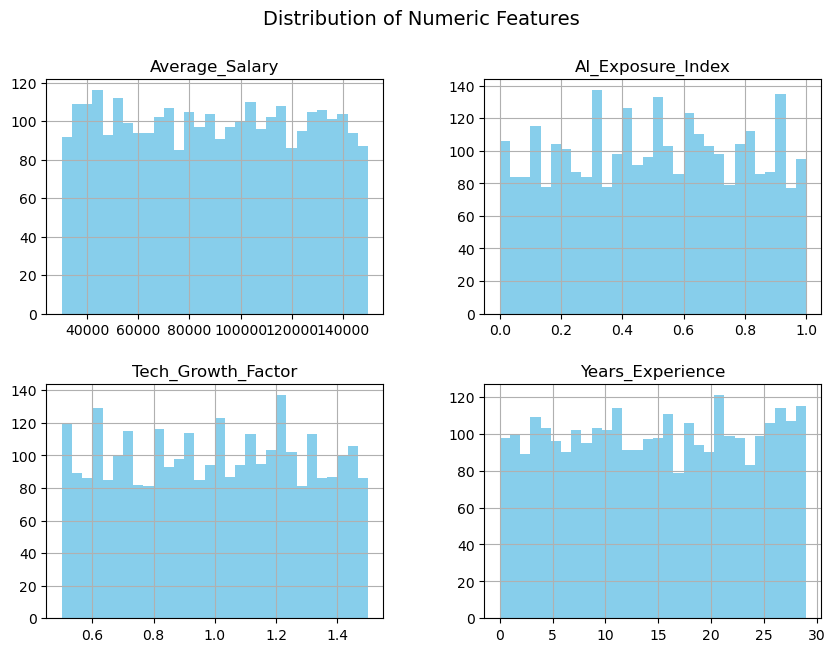

In [11]:
## outliers

numeric_features = ["Average_Salary","AI_Exposure_Index","Tech_Growth_Factor","Years_Experience"]
data[numeric_features ].hist(bins = 30, figsize=(10,7), color="skyblue")
plt.suptitle('Distribution of Numeric Features', fontsize=14)
plt.show()

C:\Users\Rashi Bali\AppData\Local\Temp\ipykernel_3180\592339720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = job_count.values, y = job_count.index , palette = "viridis")


<Axes: ylabel='Job_Title'>

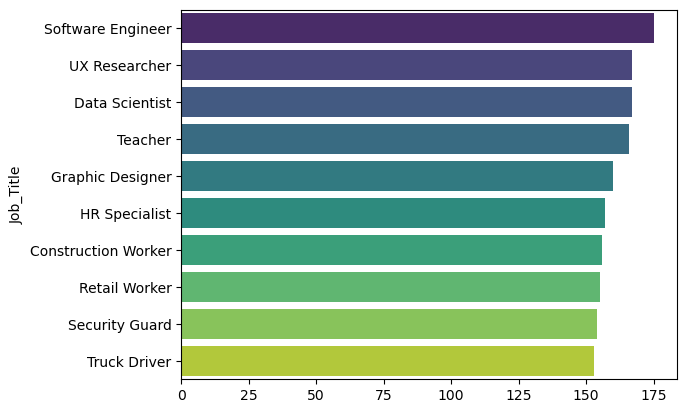

In [12]:
## TOP 10 JOB TITLES (BY AVERAGE SALARY)

job_count = data['Job_Title'].value_counts().head(10)

sns.barplot(x = job_count.values, y = job_count.index , palette = "viridis")

### Insight : Dominant industry is IT Sector with three job titles in top .

In [14]:
## AI Exposure analysis
## Are jobs with high AI exposure seeing negative growth?
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_data, x = "AI_Exposure_Index", y = "Tech_Growth_Factor", hue = "Job_Title",alpha=0.7,
    s=60, palette = "viridis")
plt.title("AI impact on Jobs")
plt.xlabel("AI exposure index on jobs")
plt.ylabel("Job growth prediction")
plt.show()

NameError: name 'filtered_data' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
top_jobtitles = data['Job_Title'].value_counts().nlargest(10).index
filtered_data = data[data['Job_Title'].isin(top_jobtitles)]

In [ ]:
## Correlation matrix to see relation with job growth and other factors
## Which variables are most correlated with job_growth_rate?
plt.figure(figsize=(9,7))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Corr Matrix showing numeric faetures")
plt.show()

### Insight : "Average Salary is highly correlated with Job Growth"

In [ ]:
## Education impact on job growth
## Does higher education correlate with better growth outlook?

plt.figure(figsize=(9,6))
sns.boxplot(data=data, x="Education_Level", y="Tech_Growth_Factor", palette="crest")
plt.title("Impact of education level on job growth")
plt.xticks(rotation=30)
plt.show()


### Insight :
1. All education levels have almost similar medians ~1
2. Job growth impact is consistent among all education groups.
3. According to IQR, no category has an exceptionally different distribution of job growth.


## SUMMARY 
1. Dataset contains 3,000 records, 18 features.
2. Strong negative correlation between AI exposure and growth rate.
